In [1]:
#all_segment_only_last_week_with12week_test_jan1_2025

In [2]:
#loading the file generated from last code
import pandas as pd
p = r"all_segment_only_last_week_with12week_test_jan1_2025.csv"
df = pd.read_csv(p)
df.head()

segment_id  week_number  week_start  week_end  week_interval  \
0   seg_2702           30          27        30              4   
1   seg_2238           30          27        30              4   
2   seg_1499           30          27        30              4   
3   seg_2235           30          27        30              4   
4   seg_2236           30          27        30              4   

   cumulative_Prob_log  crash_count_sum_12wk_test  \
0            -1.260250                        1.0   
1            -3.840635                        5.0   
2            -3.851589                        0.0   
3            -3.962838                        5.0   
4            -4.033811                        2.0   

   crashcount_binary_sum_12wk_test  
0                                1  
1                                4  
2                                0  
3                                3  
4                                2

In [3]:
df.week_interval.value_counts()

week_interval
4     3140
8     3140
12    3140
16    3140
20    3140
24    3140
28    3140
30    3140
Name: count, dtype: int64

In [4]:
len(df), 3140*8

(25120, 25120)

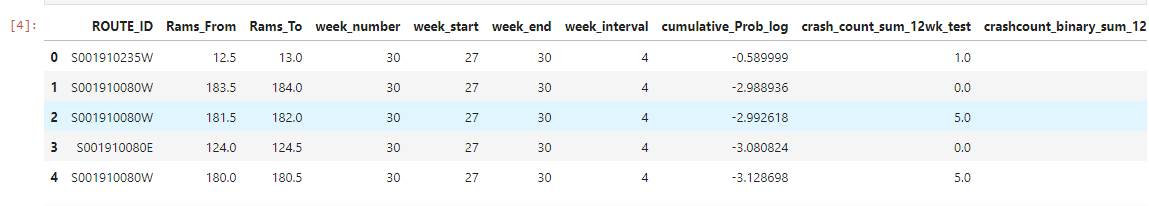

In [5]:
#https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.core.groupby.DataFrameGroupBy.rank.html
df['rank'] = df.groupby(['week_interval'])['cumulative_Prob_log'].rank(method = 'first', ascending=False)
df.head()

segment_id  week_number  week_start  week_end  week_interval  \
0   seg_2702           30          27        30              4   
1   seg_2238           30          27        30              4   
2   seg_1499           30          27        30              4   
3   seg_2235           30          27        30              4   
4   seg_2236           30          27        30              4   

   cumulative_Prob_log  crash_count_sum_12wk_test  \
0            -1.260250                        1.0   
1            -3.840635                        5.0   
2            -3.851589                        0.0   
3            -3.962838                        5.0   
4            -4.033811                        2.0   

   crashcount_binary_sum_12wk_test  rank  
0                                1   1.0  
1                                4   2.0  
2                                0   3.0  
3                                3   4.0  
4                                2   5.0

In [6]:
import math
math.ceil(200)

200

In [7]:
import math
# math.ceil converts a decimal number into integer
df['rank_range'] = df['rank'].apply(lambda x: math.ceil(x / 100) * 100)
df.head()

segment_id  week_number  week_start  week_end  week_interval  \
0   seg_2702           30          27        30              4   
1   seg_2238           30          27        30              4   
2   seg_1499           30          27        30              4   
3   seg_2235           30          27        30              4   
4   seg_2236           30          27        30              4   

   cumulative_Prob_log  crash_count_sum_12wk_test  \
0            -1.260250                        1.0   
1            -3.840635                        5.0   
2            -3.851589                        0.0   
3            -3.962838                        5.0   
4            -4.033811                        2.0   

   crashcount_binary_sum_12wk_test  rank  rank_range  
0                                1   1.0         100  
1                                4   2.0         100  
2                                0   3.0         100  
3                                3   4.0         100  
4                                2   5.0         100

In [8]:
df.loc[95:110]

segment_id  week_number  week_start  week_end  week_interval  \
95    seg_2765           30          27        30              4   
96     seg_183           30          27        30              4   
97    seg_2237           30          27        30              4   
98    seg_1501           30          27        30              4   
99    seg_1073           30          27        30              4   
100   seg_2687           30          27        30              4   
101   seg_1500           30          27        30              4   
102   seg_1516           30          27        30              4   
103   seg_3015           30          27        30              4   
104   seg_1503           30          27        30              4   
105   seg_2590           30          27        30              4   
106   seg_1493           30          27        30              4   
107   seg_2716           30          27        30              4   
108   seg_1513           30          27        30              4   
109   seg_1502           30          27        30              4   
110   seg_2222           30          27        30              4   

     cumulative_Prob_log  crash_count_sum_12wk_test  \
95             -9.425315                        1.0   
96             -9.426541                        0.0   
97             -9.496021                        1.0   
98             -9.502005                        2.0   
99             -9.504070                        0.0   
100            -9.504281                        2.0   
101            -9.629780                        1.0   
102            -9.662554                        2.0   
103            -9.674492                        0.0   
104            -9.689297                        0.0   
105            -9.779327                        2.0   
106            -9.795555                        1.0   
107            -9.812458                        0.0   
108            -9.813947                        2.0   
109            -9.820579                        0.0   
110            -9.839541                        1.0   

     crashcount_binary_sum_12wk_test   rank  rank_range  
95                                 1   96.0         100  
96                                 0   97.0         100  
97                                 1   98.0         100  
98                                 2   99.0         100  
99                                 0  100.0         100  
100                                2  101.0         200  
101                                1  102.0         200  
102                                2  103.0         200  
103                                0  104.0         200  
104                                0  105.0         200  
105                                2  106.0         200  
106                                1  107.0         200  
107                                0  108.0         200  
108                                1  109.0         200  
109                                0  110.0         200  
110                                1  111.0         200

In [9]:
df.to_csv("rank_jan1_2025.csv", index = False)

In [10]:
# the ranking is ok

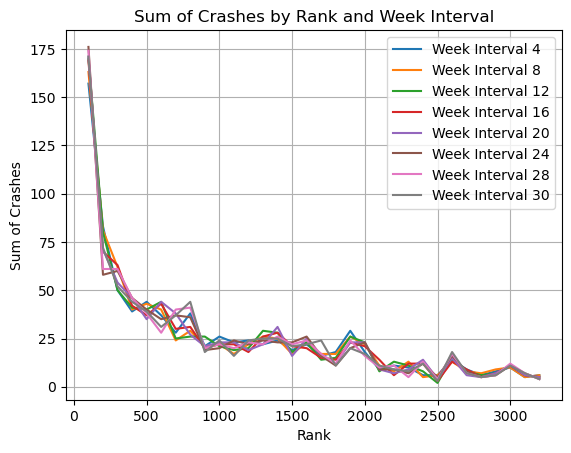

In [11]:
import matplotlib.pyplot as plt
grouped_df = df.groupby(['week_interval', 'rank_range']).sum().reset_index()

# Plot
for week_interval, group in grouped_df.groupby('week_interval'):
    plt.plot(group['rank_range'], group['crash_count_sum_12wk_test'], label=f'Week Interval {week_interval}')

plt.xlabel('Rank')
plt.ylabel('Sum of Crashes')
plt.title('Sum of Crashes by Rank and Week Interval')
plt.legend()
plt.grid(True)
plt.show()

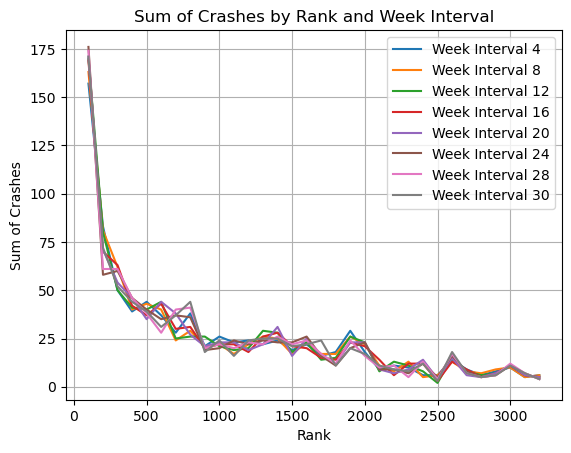

In [12]:
import matplotlib.pyplot as plt
grouped_df = df.groupby(['week_interval', 'rank_range']).sum().reset_index()

# Plot
for week_interval, group in grouped_df.groupby('week_interval'):
    plt.plot(group['rank_range'], group['crash_count_sum_12wk_test'], label=f'Week Interval {week_interval}')

plt.xlabel('Rank')
plt.ylabel('Sum of Crashes')
plt.title('Sum of Crashes by Rank and Week Interval')
plt.legend()
plt.grid(True)
plt.show()

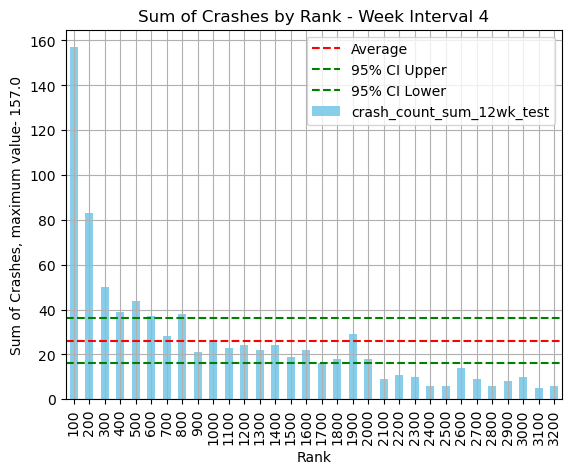

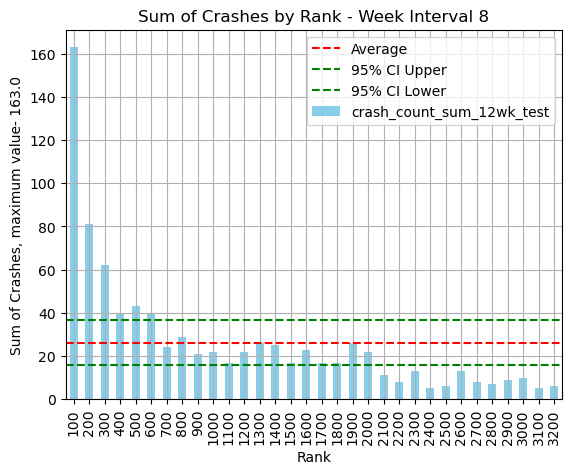

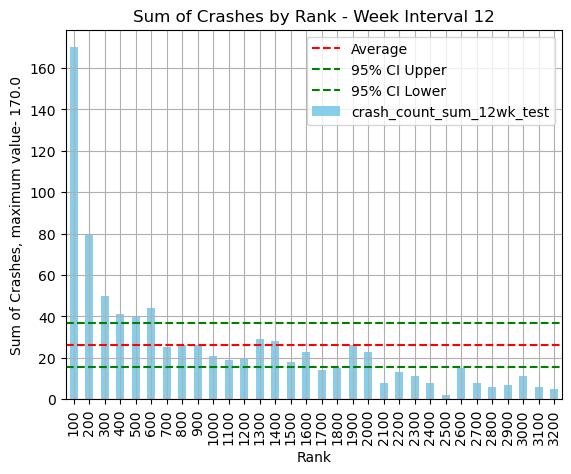

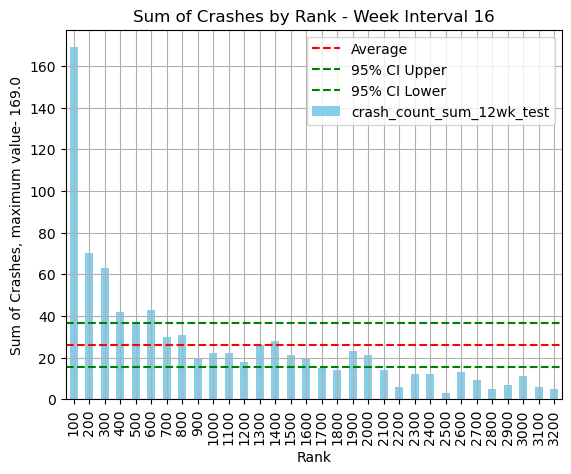

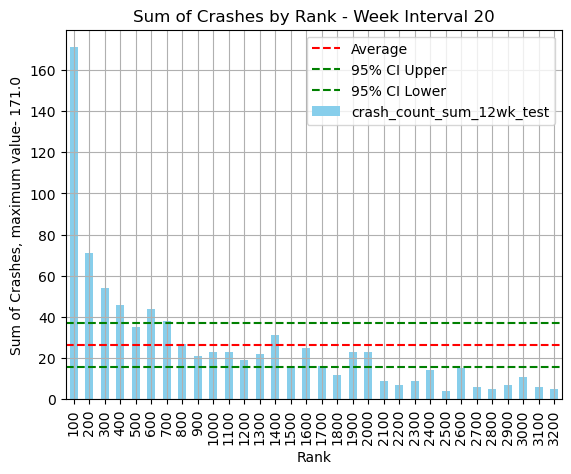

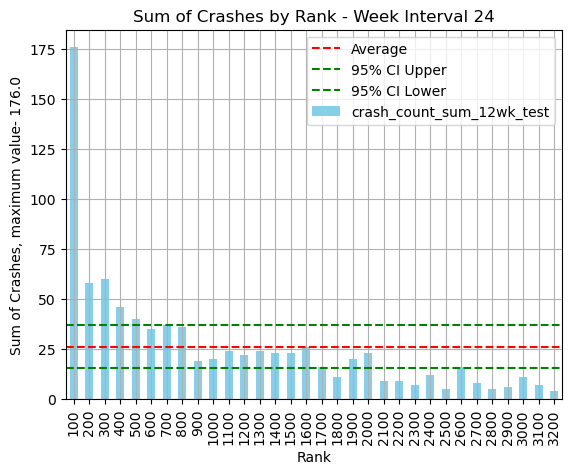

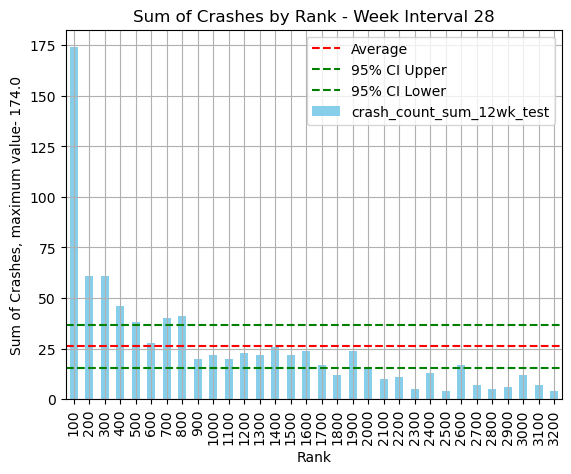

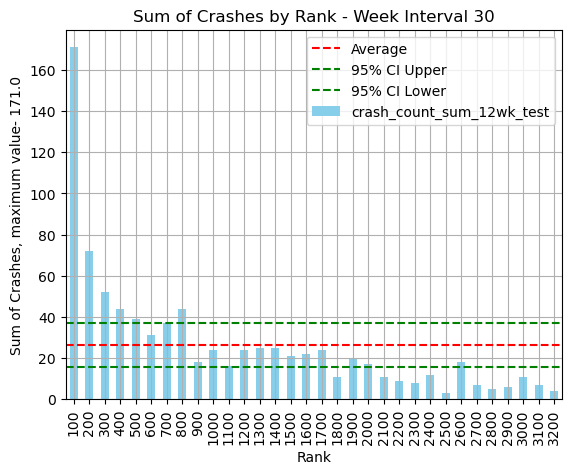

In [13]:
weeks = [4,8,12,16,20,24,28,30]

for week_no in weeks:
    df1 = df[df['week_interval']==week_no]
    grouped_data = df1.groupby('rank_range')['crash_count_sum_12wk_test'].sum()
    max_val = max(grouped_data)
    # Create bar plot
    #grouped_data.plot(kind='bar', color='skyblue')
    avg = grouped_data.mean()
    ci = 1.96 * grouped_data.sem()  # 95% CI (assuming normal distribution)

    # Create bar plot
    ax = grouped_data.plot(kind='bar', color='skyblue')
    ax.set_title(f'Sum of Crashes by Rank - Week Interval {week_no}')
    ax.set_xlabel('Rank')
    ax.set_ylabel(f'Sum of Crashes, maximum value- {max_val}')
    ax.set_xticklabels(grouped_data.index, rotation=90)
    ax.grid(True)
    
    # Add average line
    ax.axhline(y=avg, color='red', linestyle='--', label='Average')
    
    # Add 95% CI lines
    ax.axhline(y=avg + ci, color='green', linestyle='--', label='95% CI Upper')
    ax.axhline(y=avg - ci, color='green', linestyle='--', label='95% CI Lower')
    
    # Show legend
    ax.legend()
    plt.savefig(f"image/{week_no}_for12weektest_jan2_2025.png")
    plt.show()
    plt.clf()
    #plt.savefig(f"C:/Users/maroa/Box/Projects_Maroa/Paper_writing/data/tablueu_files/images_tableau/{week_no}_for12weektest.png")
    
plt.close()  
    



In [14]:
grouped_data

rank_range
100     171.0
200      72.0
300      52.0
400      44.0
500      39.0
600      31.0
700      37.0
800      44.0
900      18.0
1000     24.0
1100     16.0
1200     24.0
1300     25.0
1400     25.0
1500     21.0
1600     22.0
1700     24.0
1800     11.0
1900     20.0
2000     17.0
2100     11.0
2200      9.0
2300      8.0
2400     12.0
2500      3.0
2600     18.0
2700      7.0
2800      5.0
2900      6.0
3000     11.0
3100      7.0
3200      4.0
Name: crash_count_sum_12wk_test, dtype: float64

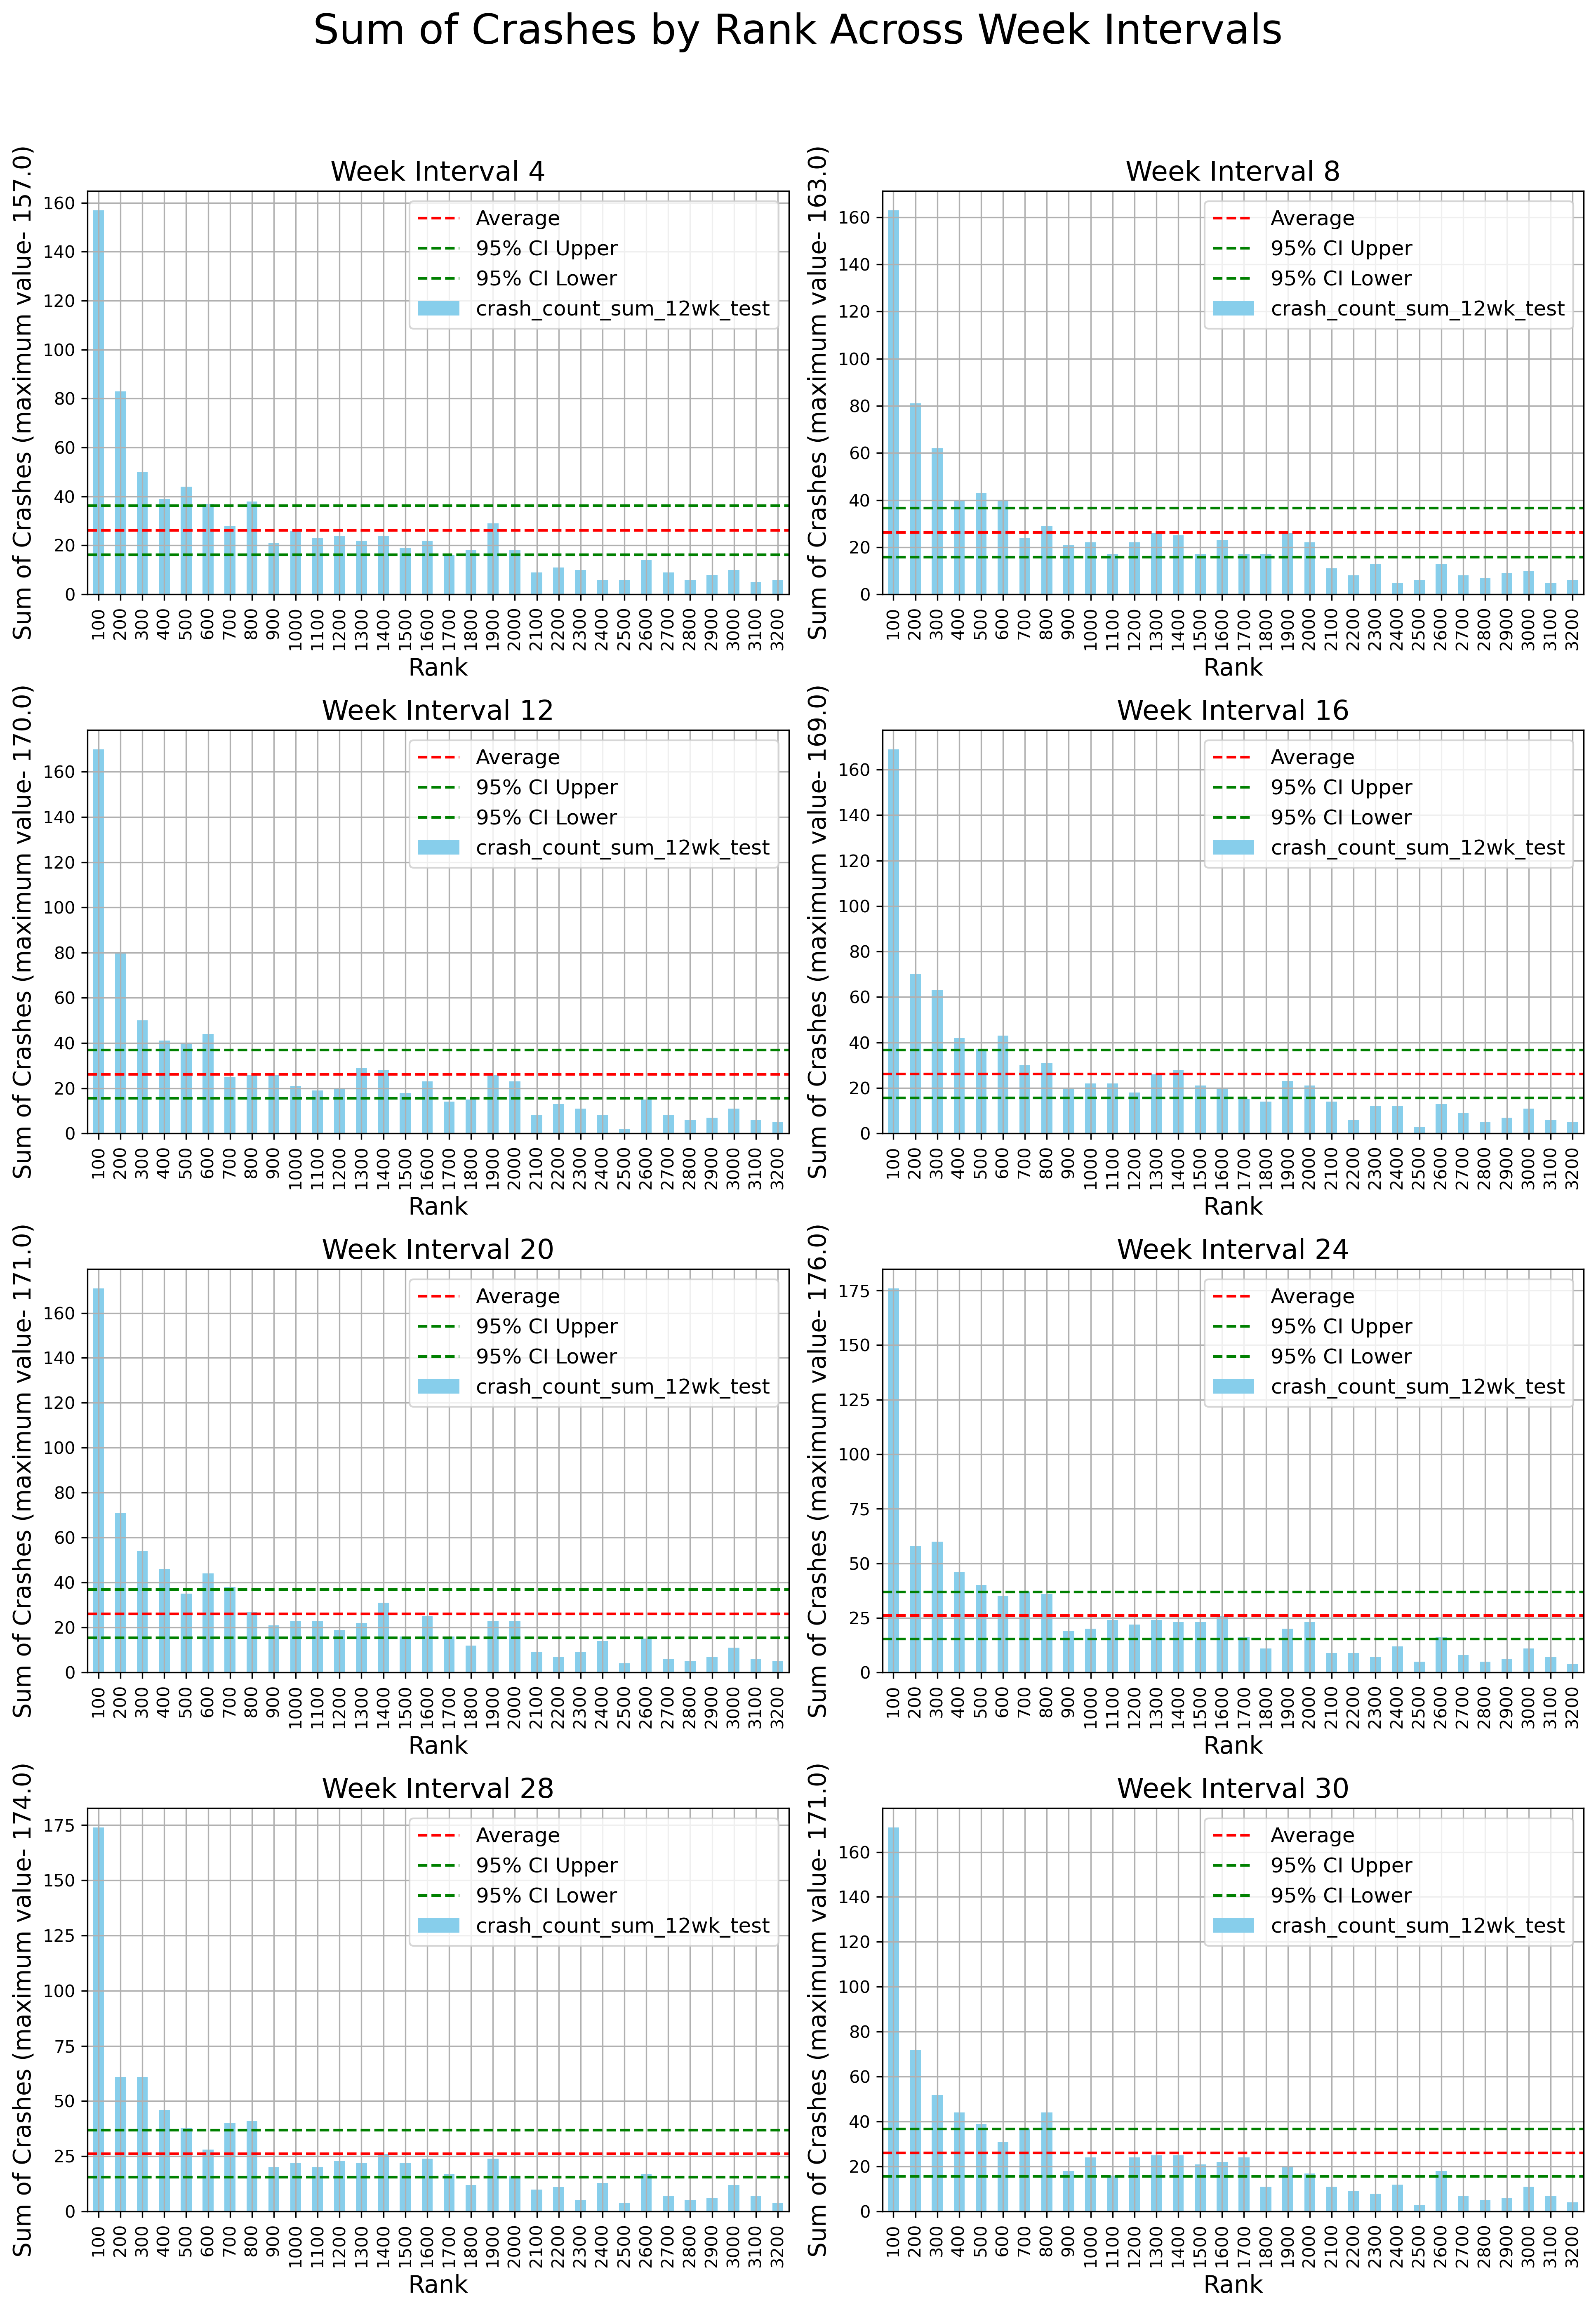

In [15]:
weeks = [4,8,12,16,20,24,28,30]

'''# Example data setup
np.random.seed(42)
data = {
    "week_interval": np.repeat([4, 8, 12, 16, 20, 24, 28, 30], 10),
    "rank_range": np.tile([f"Rank {i}" for i in range(1, 11)], 8),
    "crash_count_sum_12wk_test": np.random.randint(0, 100, 80)
}

df = pd.DataFrame(data)

# List of weeks to iterate over
weeks = [4, 8, 12, 16, 20, 24, 28, 30]'''

# Create a 2x4 subplot
fig, axes = plt.subplots(4, 2, figsize=(13, 19), dpi=300)
fig.suptitle("Sum of Crashes by Rank Across Week Intervals", fontsize=24)

# Loop through weeks and plot on subplots
for i, week_no in enumerate(weeks):
    # Filter data for the specific week
    df1 = df[df['week_interval'] == week_no]
    grouped_data = df1.groupby('rank_range')['crash_count_sum_12wk_test'].sum()
    max_val = grouped_data.max()
    avg = grouped_data.mean()
    ci = 1.96 * grouped_data.sem()  # 95% CI (assuming normal distribution)
    
    # Plotting
    ax = axes[i // 2, i % 2]
    grouped_data.plot(kind='bar', color='skyblue', ax=ax)
    ax.set_title(f"Week Interval {week_no}", fontsize=16)
    ax.set_xlabel("Rank", fontsize=14)
    ax.set_ylabel(f'Sum of Crashes (maximum value- {max_val})', fontsize=14)
    ax.set_xticklabels(grouped_data.index, rotation=90, fontsize=10)
    ax.grid(True)
    
    # Add average and confidence interval lines
    ax.axhline(y=avg, color='red', linestyle='--', label='Average')
    ax.axhline(y=avg + ci, color='green', linestyle='--', label='95% CI Upper')
    ax.axhline(y=avg - ci, color='green', linestyle='--', label='95% CI Lower')
    
    # Show legend
    ax.legend(fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save high-resolution plot
output_path = "image/crash_data_subplot_matrix_total_crash.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight")

# Show plot
plt.show()


### for binary data (segment has crashes or not)

In [16]:
import numpy as np
df['crash_binary_12week_test'] = np.where(df.crash_count_sum_12wk_test>=1,1,0)
df.head()

segment_id  week_number  week_start  week_end  week_interval  \
0   seg_2702           30          27        30              4   
1   seg_2238           30          27        30              4   
2   seg_1499           30          27        30              4   
3   seg_2235           30          27        30              4   
4   seg_2236           30          27        30              4   

   cumulative_Prob_log  crash_count_sum_12wk_test  \
0            -1.260250                        1.0   
1            -3.840635                        5.0   
2            -3.851589                        0.0   
3            -3.962838                        5.0   
4            -4.033811                        2.0   

   crashcount_binary_sum_12wk_test  rank  rank_range  crash_binary_12week_test  
0                                1   1.0         100                         1  
1                                4   2.0         100                         1  
2                                0   3.0         100                         0  
3                                3   4.0         100                         1  
4                                2   5.0         100                         1

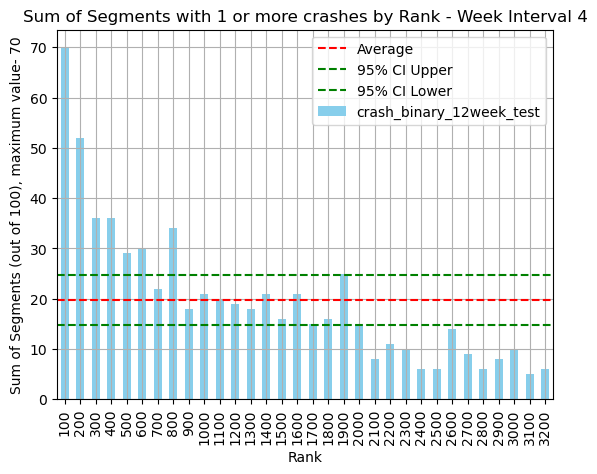

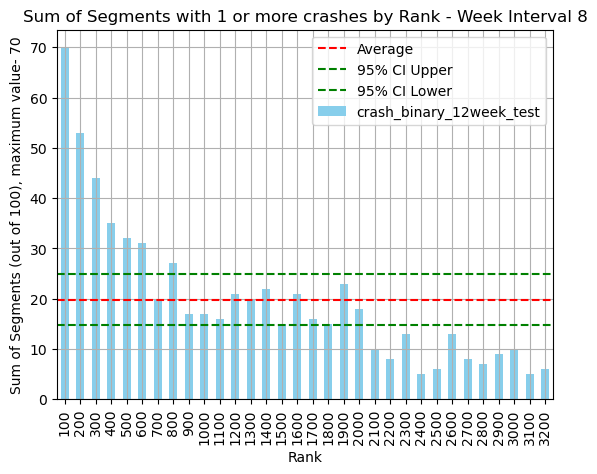

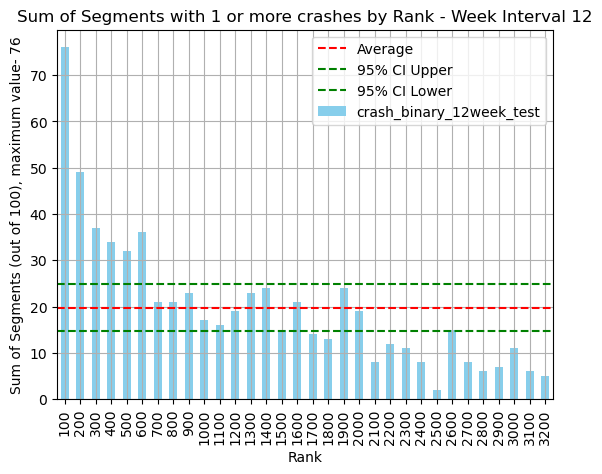

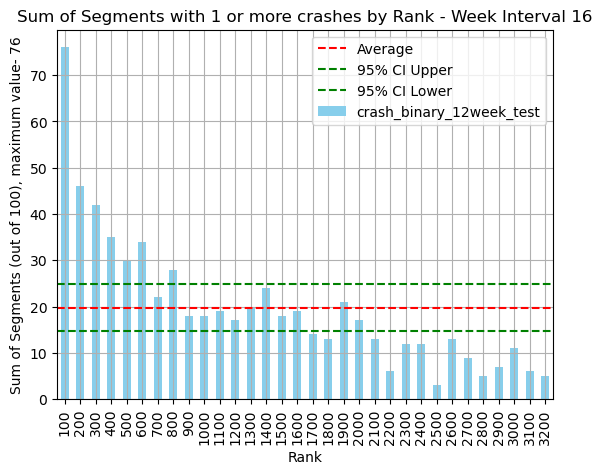

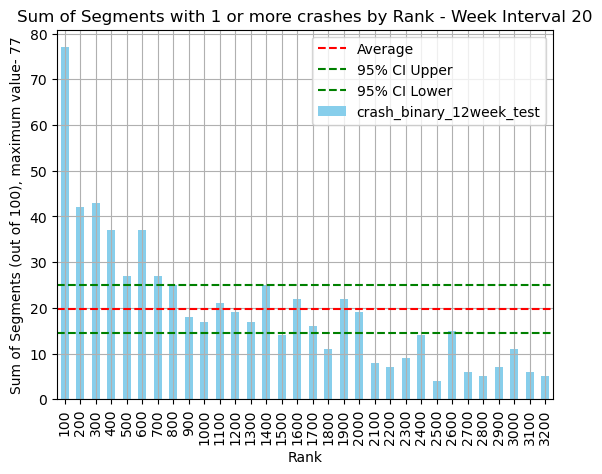

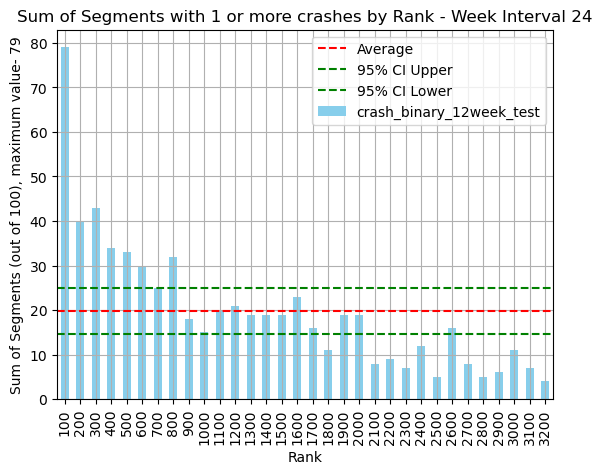

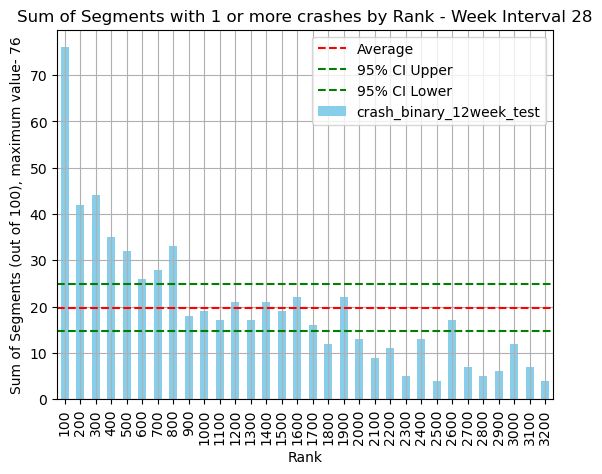

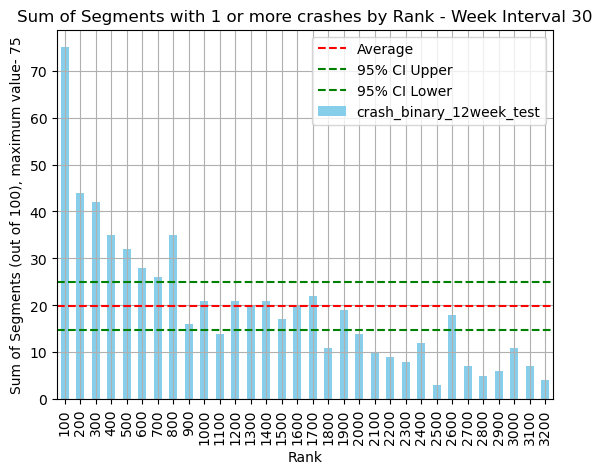

In [17]:
weeks = [4,8,12,16,20,24,28,30]
for week_no in weeks:
    df1 = df[df['week_interval']==week_no]
    grouped_data = df1.groupby('rank_range')['crash_binary_12week_test'].sum()
    max_val = max(grouped_data)
    # Create bar plot
    avg = grouped_data.mean()
    ci = 1.96 * grouped_data.sem()  # 95% CI (assuming normal distribution)

    # Create bar plot
    ax = grouped_data.plot(kind='bar', color='skyblue')
    ax.set_title(f'Sum of Segments with 1 or more crashes by Rank - Week Interval {week_no}')
    ax.set_xlabel('Rank')
    ax.set_ylabel(f'Sum of Segments (out of 100), maximum value- {max_val}')
    ax.set_xticklabels(grouped_data.index, rotation=90)
    ax.grid(True)
    
    # Add average line
    ax.axhline(y=avg, color='red', linestyle='--', label='Average')
    
    # Add 95% CI lines
    ax.axhline(y=avg + ci, color='green', linestyle='--', label='95% CI Upper')
    ax.axhline(y=avg - ci, color='green', linestyle='--', label='95% CI Lower')
    
    # Show legend
    ax.legend()
    plt.savefig(f"image/{week_no}_for12weektest_crash_binary_jan2_2025.png")
    plt.show()
    #plt.savefig(f"C:/Users/maroa/Box/Projects_Maroa/Paper_writing/data/tablueu_files/images_tableau/{week_no}_for12weektest.png")
    
    
    



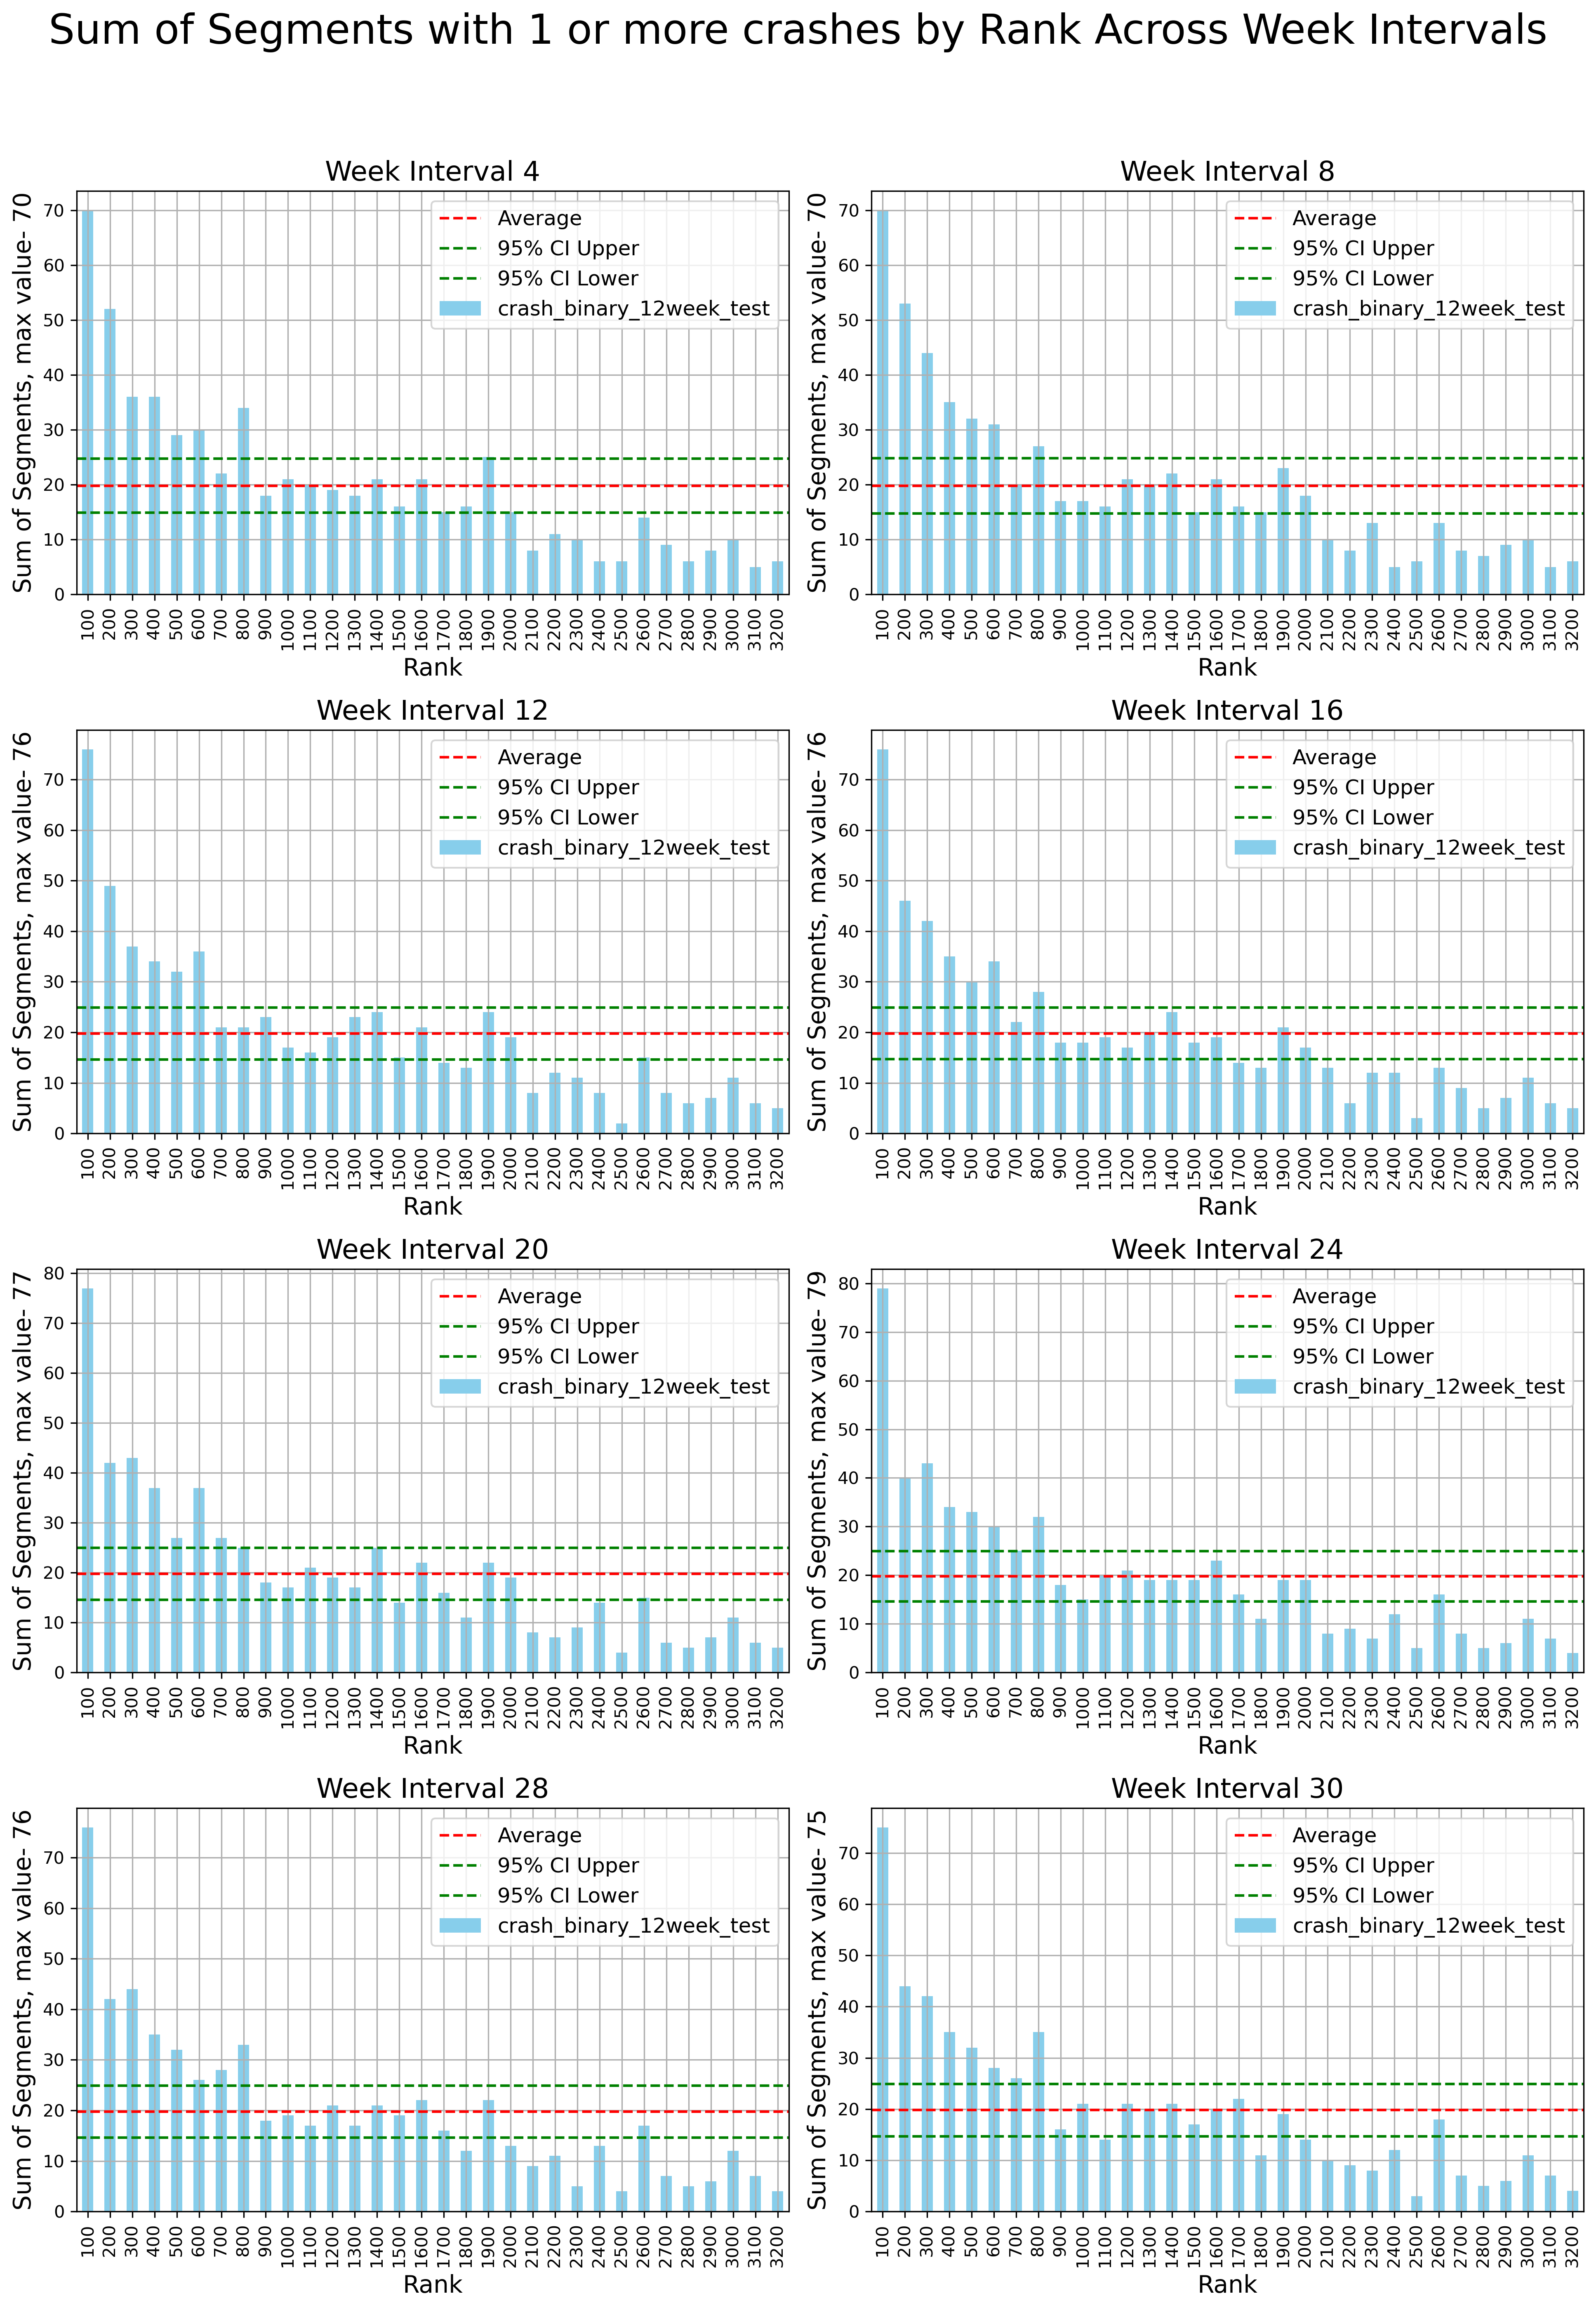

In [19]:
weeks = [4,8,12,16,20,24,28,30]

# Create a 2x4 subplot
fig, axes = plt.subplots(4, 2, figsize=(13, 19), dpi=300)
fig.suptitle("Sum of Segments with 1 or more crashes by Rank Across Week Intervals", fontsize=24)

# Loop through weeks and plot on subplots
for i, week_no in enumerate(weeks):
    # Filter data for the specific week
    df1 = df[df['week_interval'] == week_no]
    grouped_data = df1.groupby('rank_range')['crash_binary_12week_test'].sum()
    max_val = grouped_data.max()
    avg = grouped_data.mean()
    ci = 1.96 * grouped_data.sem()  # 95% CI (assuming normal distribution)
    
    # Plotting
    ax = axes[i // 2, i % 2]
    grouped_data.plot(kind='bar', color='skyblue', ax=ax)
    ax.set_title(f"Week Interval {week_no}", fontsize=16)
    ax.set_xlabel("Rank", fontsize=14)
    ax.set_ylabel(f'Sum of Segments, max value- {max_val}', fontsize=14)
    ax.set_xticklabels(grouped_data.index, rotation=90, fontsize=10)
    ax.grid(True)
    
    # Add average and confidence interval lines
    ax.axhline(y=avg, color='red', linestyle='--', label='Average')
    ax.axhline(y=avg + ci, color='green', linestyle='--', label='95% CI Upper')
    ax.axhline(y=avg - ci, color='green', linestyle='--', label='95% CI Lower')
    
    # Show legend
    ax.legend(fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save high-resolution plot
output_path = "image/crash_data_subplot_matrix_total_segment_with_min1_crash.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight")

# Show plot
plt.show()
